https://python-sounddevice.readthedocs.io/en/0.3.7/
http://homediyelectronics.com/projects/howtomakeafreesoundcardpcoscilloscope/?p=3

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import math,sys,os
import numpy as np
import numpy.random as rand
from numpy.fft import fft
import sounddevice as sd
from matplotlib import rcParams, animation, rc
from __future__ import print_function, division

In [11]:
fs = 96000
#fs = 48000
sd.default.samplerate = fs

sd.default.channels = 1
sd.default.dtype = 'float64'
duration = 5  # seconds

t = np.arange(0,duration,1/fs)
dt = 1/fs

In [4]:
import numpy as np

x = np.array([1,2,1,0,1,2,1,0])
w = np.fft.fft(x)
freqs = np.fft.fftfreq(len(x))

for coef,freq in zip(w,freqs):
    if coef:
        print('{c:>6} * exp(2 pi i t * {f})'.format(c=coef,f=freq))

(8+0j) * exp(2 pi i t * 0.0)
   -4j * exp(2 pi i t * 0.25)
    4j * exp(2 pi i t * -0.25)


In [21]:
freqs
t

array([  0.00000000e+00,   1.04166667e-05,   2.08333333e-05, ...,
         4.99996875e+00,   4.99997917e+00,   4.99998958e+00])

In [22]:
fs = 96000
#fs = 48000
sd.default.samplerate = fs

sd.default.channels = 1
sd.default.dtype = 'float64'
duration = 2  # seconds

t = np.arange(0,duration,1/fs)
dt = 1/fs

myrecording = sd.rec(int(duration * fs), dtype='float64', samplerate=fs, channels=2)
sd.wait()
myrecording.max()

0.00083146593533456326

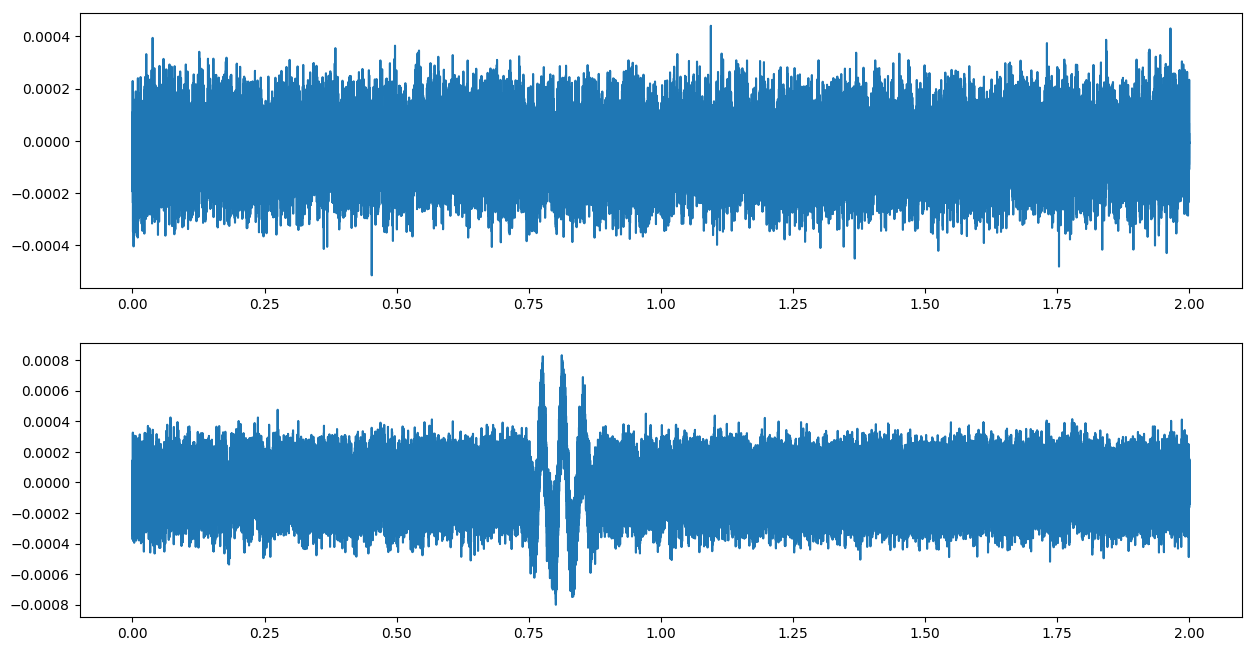

In [23]:
plt.figure(figsize=[15,8],dpi=100)
plt.subplot(211)
plt.plot(t,myrecording.T[0])
plt.subplot(212)
plt.plot(t,myrecording.T[1])


96000 2 96000


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


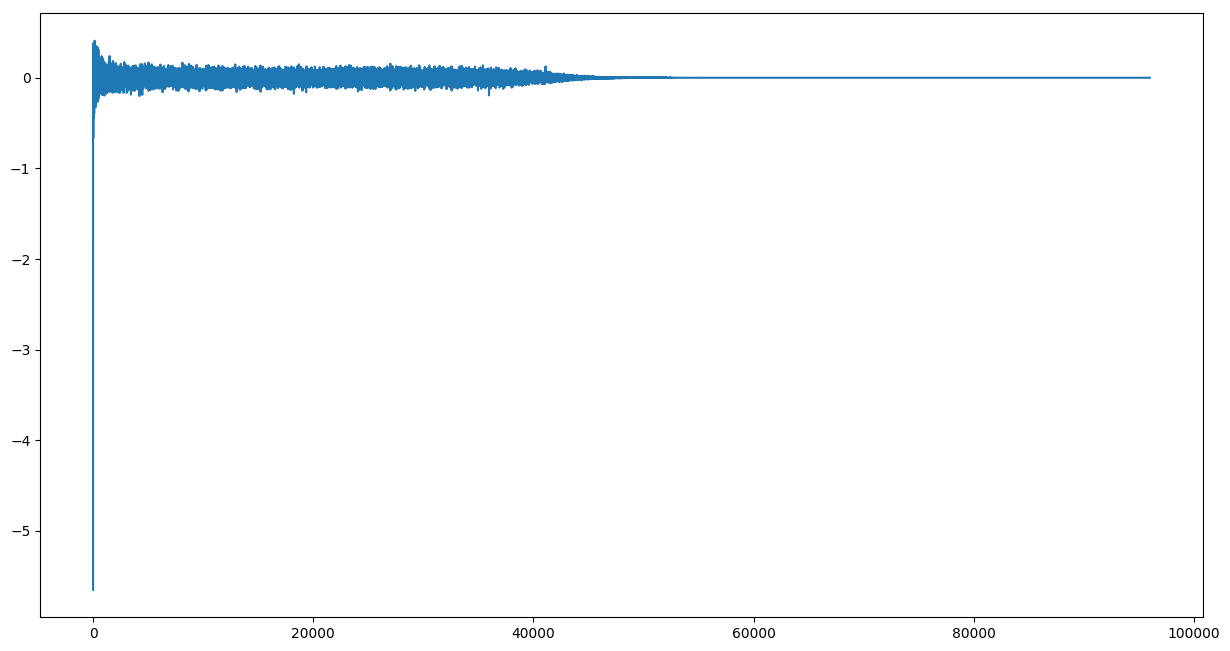

In [33]:
myrecording_w=fft(myrecording.T[0])
w = np.arange(0,fs,2/(duration))
print(w.size, duration, fs)
freqs = np.fft.fftfreq(int(duration*1000))

plt.figure(figsize=[15,8],dpi=100)
plt.plot(w,myrecording_w[:int(fs*duration/2)])

In [25]:
w = np.arange(0,fs,2/(duration))
print(w.size)
freqs = np.fft.fftfreq(int(duration*1000))

plt.figure(figsize=[15,8],dpi=100)
plt.plot(w,myrecording_w[:fs*duration/2])
#plt.semilogy(w,myrecording_w[:fs*duration/2])
#plt.loglog(w,myrecording_w[:fs*duration/2])

freq

96000


TypeError: slice indices must be integers or None or have an __index__ method

In [13]:
myrecording.max()

0.16965165734291077

In [61]:
sd.play(myrecording, 48000)

In [67]:
np.exp(2j * np.pi * np.arange(8) / 8)

array([  1.00000000e+00 +0.00000000e+00j,
         7.07106781e-01 +7.07106781e-01j,
         6.12323400e-17 +1.00000000e+00j,
        -7.07106781e-01 +7.07106781e-01j,
        -1.00000000e+00 +1.22464680e-16j,
        -7.07106781e-01 -7.07106781e-01j,
        -1.83697020e-16 -1.00000000e+00j,   7.07106781e-01 -7.07106781e-01j])

In [81]:
freq, w.size

(-0.125, 1008000)

In [24]:
plt.figure(figsize=[15,8],dpi=100)
myrecording_w=fft(myrecording.T[0])
w = np.arange(0,fs,2/(duration))
print(w.size)
freqs = np.fft.fftfreq(int(duration*1000))
plt.plot(w,myrecording_w[:fs*duration/2])
#plt.semilogy(w,myrecording_w[:fs*duration/2])
#plt.loglog(w,myrecording_w[:fs*duration/2])

freq

96000


TypeError: slice indices must be integers or None or have an __index__ method

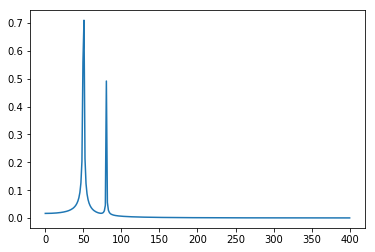

In [80]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

ValueError: x and y must have same first dimension, but have shapes (480000,) and (192000,)

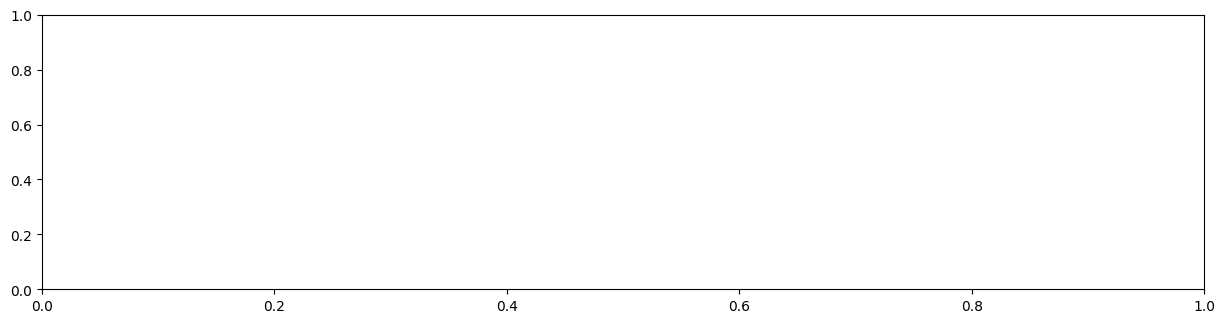

In [18]:
plt.figure(figsize=[15,8],dpi=100)
plt.subplot(211)
plt.plot(t,myrecording.T[0])
plt.subplot(212)
plt.plot(t,myrecording.T[1])
